In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt 

# Box plots from one music

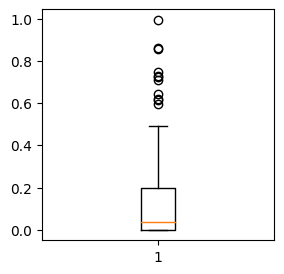

,0
0,0.643
1,0.746
2,0.722
3,0.095
4,0.091
...,...
78,0.000
79,0.000
80,0.000
81,0.000


In [2]:
with h5py.File('../../dataset/A/A/A/TRAAAAW128F429D538.h5') as hf:
      actual_confidence = pd.DataFrame(hf['analysis']['bars_confidence'][:])

plt.figure(figsize=(3,3))
plt.boxplot(actual_confidence)
plt.show()

actual_confidence

# Box plots of the aggregate of all 'bars_confidence'

In [3]:
boxplots_dict[feature] = pd.DataFrame()

for folder in os.listdir('../../dataset/'):
    for folder_bis in os.listdir(f'../../dataset/{folder}'):
        for folder_ter in os.listdir(f'../../dataset/{folder}/{folder_bis}'):
            for h5_file in os.listdir(f'../../dataset/{folder}/{folder_bis}/{folder_ter}'):

            
                with h5py.File(f'../../dataset/{folder}/{folder_bis}/{folder_ter}/{h5_file}', 'r') as hf:

                    actual_confidence = pd.DataFrame(hf['analysis']['bars_confidence'][:])

                    boxplots_dict[feature] = pd.concat([boxplots_dict[feature], actual_confidence], axis=0)

boxplots_dict[feature]

,0
0,0.368
1,0.323
2,0.396
3,0.431
4,0.108
...,...
87,0.000
88,0.000
89,0.000
90,0.000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9911580f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9911582750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99115807d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9911798290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99117abe50>],
 'means': []}

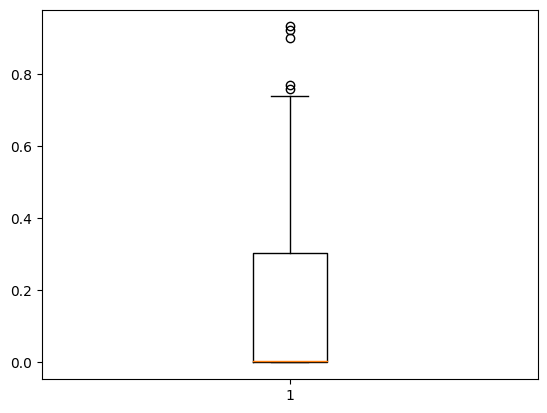

In [7]:
plt.boxplot(actual_confidence)

# Box plots of all the confidence values of features in "analysis" group

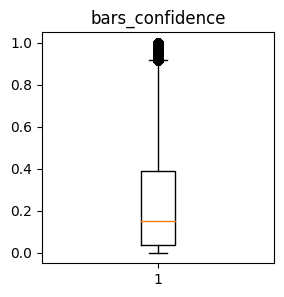

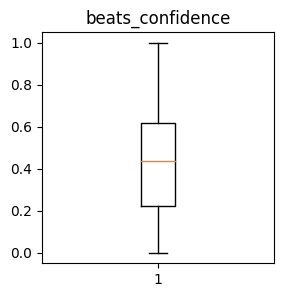

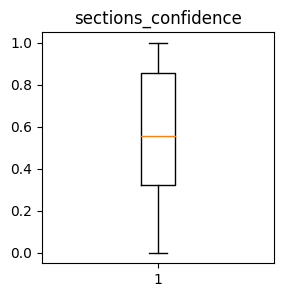

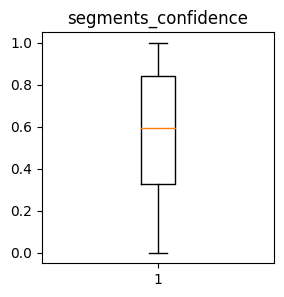

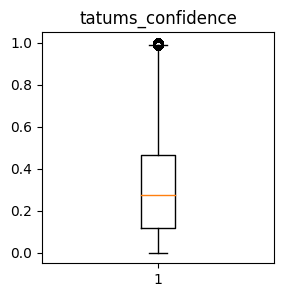

In [9]:
features_to_check = ['bars_confidence', 'beats_confidence', 'sections_confidence', \
                     'segments_confidence', 'tatums_confidence']

boxplots_dict = {}

for feature in features_to_check:

    boxplots_dict[feature] = pd.DataFrame()

    for folder in os.listdir('../../dataset/'):
        for folder_bis in os.listdir(f'../../dataset/{folder}'):
            for folder_ter in os.listdir(f'../../dataset/{folder}/{folder_bis}'):
                for h5_file in os.listdir(f'../../dataset/{folder}/{folder_bis}/{folder_ter}'):

                
                    with h5py.File(f'../../dataset/{folder}/{folder_bis}/{folder_ter}/{h5_file}', 'r') as hf:

                        actual_confidence = pd.DataFrame(hf['analysis'][feature][:])

                        boxplots_dict[feature] = pd.concat([boxplots_dict[feature], actual_confidence], axis=0)

    plt.figure(figsize=(3,3))
    plt.title(feature)
    plt.boxplot(boxplots_dict[feature])
    plt.show()

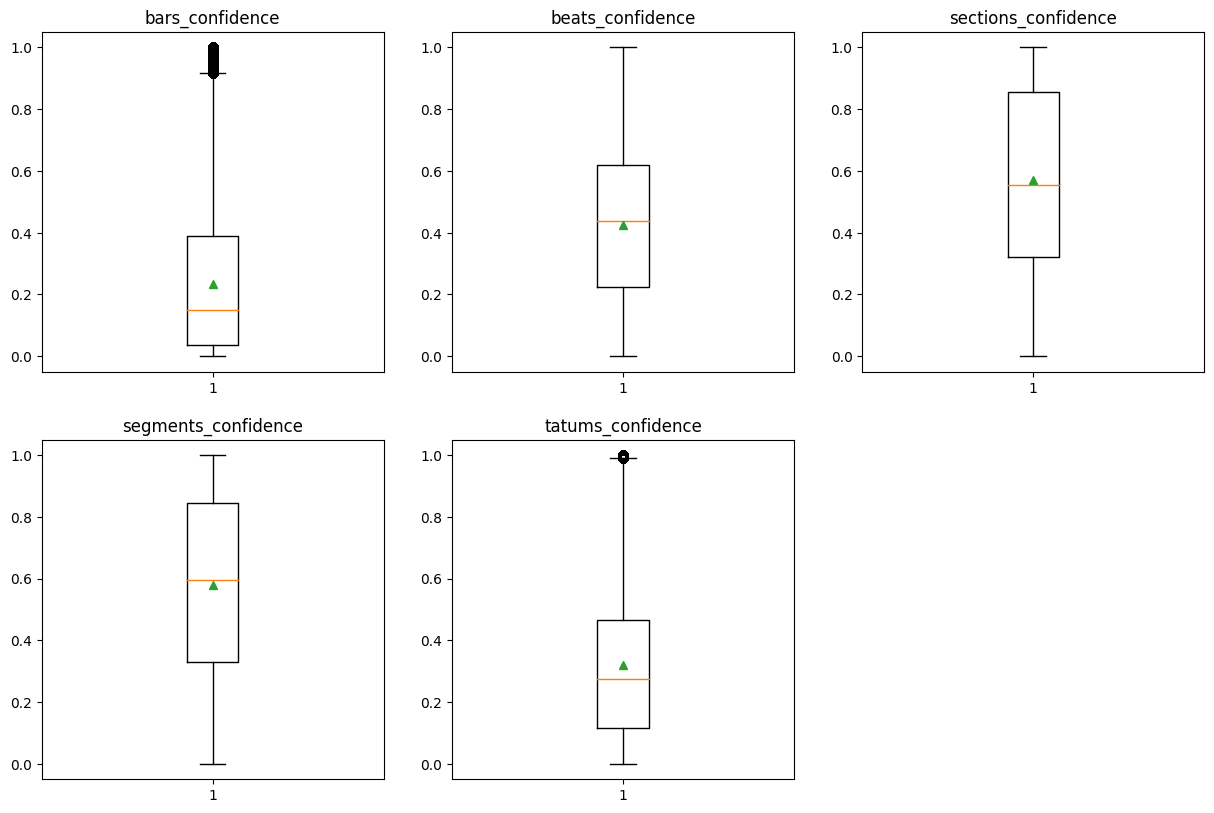

In [26]:
i=1
plt.figure(figsize=(15,15))
for feature in features_to_check:
    plt.subplot(3,3,i)
    plt.title(feature)
    plt.boxplot(boxplots_dict[feature],showmeans=True)
    i+=1
plt.show()